HYPOTHESIS:Airbnb listings in Central areas have higher average prices than listings in the outskirts.

It should be noted that "City" councils are defined as Melbourne, Yarra, Port Philip, Stonnington, Boroondara, Moreland 
There are a total of 79 councils in Victoria (regional and Melbourne)
This dataset captures 30 of these councils.



In [61]:
#Dependancies and Setup
from pathlib import Path
import pandas as pd
import numpy as np

In [62]:
#Create a Path to the file
Melbourne_data = Path("Outputs/Melbourne_refined_listings_cleaned.csv")

In [63]:
# Read School and Student Data File and store into Pandas DataFrames
Melbourne_Price_Location_data = pd.read_csv(Melbourne_data)

In [64]:
#Test the data has come in properly by printing the first five values.
Melbourne_Price_Location_data.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.0,4.6,4.43,4.37,3.97,8,0,4,4,1.21
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.2,4.2,4.20,4.20,4.20,3,0,3,0,0.81
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,5.0,5.0,5.00,4.50,4.00,105,105,0,0,0.98
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.0,5.0,5.00,5.00,5.00,1,0,1,0,1.00
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,4.0,3.5,4.00,4.00,5.00,7,7,0,0,2.00


In [65]:
import pandas as pd

# Assuming you already have the "Melbourne_Price_Location_data" DataFrame
# with columns: "Neighbourhood_Cleansed", "Latitude", "Longitude", and "Price"

# Set "Neighbourhood_Cleansed" as the index
Melbourne_Price_Location_data.set_index("neighbourhood_cleansed", inplace=True)

# Create a new DataFrame with selected columns
location_price_df = Melbourne_Price_Location_data[["latitude", "longitude", "price"]]

# Print the first few rows of the new DataFrame
location_price_df


,latitude,longitude,price
neighbourhood_cleansed,,,
Port Phillip,-37.859820,144.977440,$123.00
Brimbank,-37.788550,144.844210,$50.00
Melbourne,-37.808110,144.949960,$166.00
Glen Eira,-37.923756,145.062736,$120.00
Port Phillip,-37.833316,144.969121,$202.00
...,...,...,...
Melbourne,-37.823820,144.961340,$179.00
Melbourne,-37.826868,144.957080,$193.00
Melbourne,-37.802340,144.967980,$115.00


In [66]:
# Assuming you have a DataFrame called location_price_df
# with an index column named 'neighbourhood_cleansed'

# Get unique neighborhood names from the index
unique_neighborhoods = location_price_df.index.unique()

print("Unique neighborhood names:")
for neighborhood in unique_neighborhoods:
    print(neighborhood)


Unique neighborhood names:
Port Phillip
Brimbank
Melbourne
Glen Eira
Yarra
Darebin
Boroondara
Hobsons Bay
Hume
Stonnington
Yarra Ranges
Bayside
Moreland
Cardinia
Maribyrnong
Manningham
Banyule
Kingston
Whitehorse
Wyndham
Frankston
Moonee Valley
Casey
Melton
Whittlesea
Monash
Nillumbik
Maroondah
Knox
Greater Dandenong


In [67]:
import pandas as pd

# Assuming you have a DataFrame called location_price_df
# with columns: 'neighbourhood_cleansed', 'price'

# Remove the comma and dollar sign, and convert 'price' column to numeric
location_price_df.loc[:, 'price'] = location_price_df['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()

print("Mean prices for each neighborhood:")
print(mean_prices)


Mean prices for each neighborhood:
neighbourhood_cleansed
Banyule                   180.7
Bayside              340.980392
Boroondara           231.287938
Brimbank             176.215517
Cardinia             231.490196
Casey                179.762295
Darebin              181.852941
Frankston            238.577381
Glen Eira             211.57265
Greater Dandenong     126.45614
Hobsons Bay          187.362069
Hume                 185.890625
Kingston             283.852564
Knox                 166.767442
Manningham           282.229167
Maribyrnong          185.278884
Maroondah            180.223881
Melbourne            275.624857
Melton                  193.875
Monash               253.559471
Moonee Valley        208.609929
Moreland             148.577367
Nillumbik            273.055556
Port Phillip         293.805508
Stonnington          228.631868
Whitehorse              174.104
Whittlesea           162.307692
Wyndham              175.856061
Yarra                 267.44687
Yarra Ranges  

In [68]:
# Calculate the mode and median for each unique neighborhood
mode_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].apply(lambda x: x.mode().iloc[0])
median_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].median()

print('Mode prices for each neighborhood:')
print(mode_prices)

print('Median prices for each neighborhood:')
print(median_prices)



Mode prices for each neighborhood:
neighbourhood_cleansed
Banyule               50.0
Bayside              200.0
Boroondara            98.0
Brimbank              60.0
Cardinia             200.0
Casey                 60.0
Darebin               70.0
Frankston            120.0
Glen Eira            300.0
Greater Dandenong     46.0
Hobsons Bay          100.0
Hume                  50.0
Kingston              80.0
Knox                 186.0
Manningham           128.0
Maribyrnong          100.0
Maroondah             80.0
Melbourne            258.0
Melton               229.0
Monash                65.0
Moonee Valley        140.0
Moreland              61.0
Nillumbik            100.0
Port Phillip         200.0
Stonnington          140.0
Whitehorse            55.0
Whittlesea            50.0
Wyndham               50.0
Yarra                150.0
Yarra Ranges         250.0
Name: price, dtype: float64
Median prices for each neighborhood:
neighbourhood_cleansed
Banyule              125.0
Bayside          

In [69]:
import pandas as pd

# Assuming you have calculated mean_prices, mode_prices, and median_prices
# Create a DataFrame to store the results
summary_df = pd.DataFrame(index=mean_prices.index)

# Add mean, mode, and median columns
summary_df['Mean Price'] = mean_prices
summary_df['Mode Price'] = mode_prices
summary_df['Median Price'] = median_prices

# Display the summary DataFrame
summary_df


,Mean Price,Mode Price,Median Price
neighbourhood_cleansed,,,
Banyule,180.7,50.0,125.0
Bayside,340.980392,200.0,250.0
Boroondara,231.287938,98.0,172.0
Brimbank,176.215517,60.0,111.5
Cardinia,231.490196,200.0,198.5
Casey,179.762295,60.0,169.0
Darebin,181.852941,70.0,142.5
Frankston,238.577381,120.0,182.5
Glen Eira,211.57265,300.0,150.5


Findings: The highest mean is Yarra Ranges, 343 which is one of the furtherst from Melbourne. 

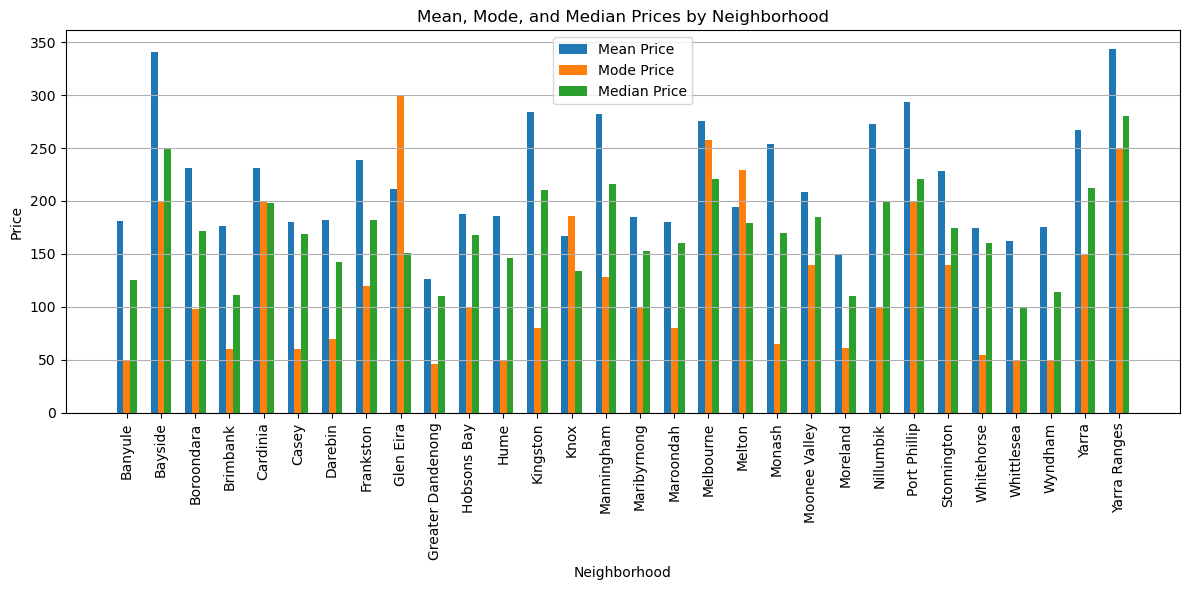

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated mean_prices, mode_prices, and median_prices
x = np.arange(len(mean_prices))  # Create an array of indices for neighborhoods
width = 0.2  # Width of each bar

plt.figure(figsize=(12, 6))

# Plot mean prices
plt.bar(x - width, mean_prices, width, label='Mean Price')

# Plot mode prices
plt.bar(x, mode_prices, width, label='Mode Price')

# Plot median prices
plt.bar(x + width, median_prices, width, label='Median Price')

plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Mean, Mode, and Median Prices by Neighborhood')
plt.xticks(x, mean_prices.index, rotation=90)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


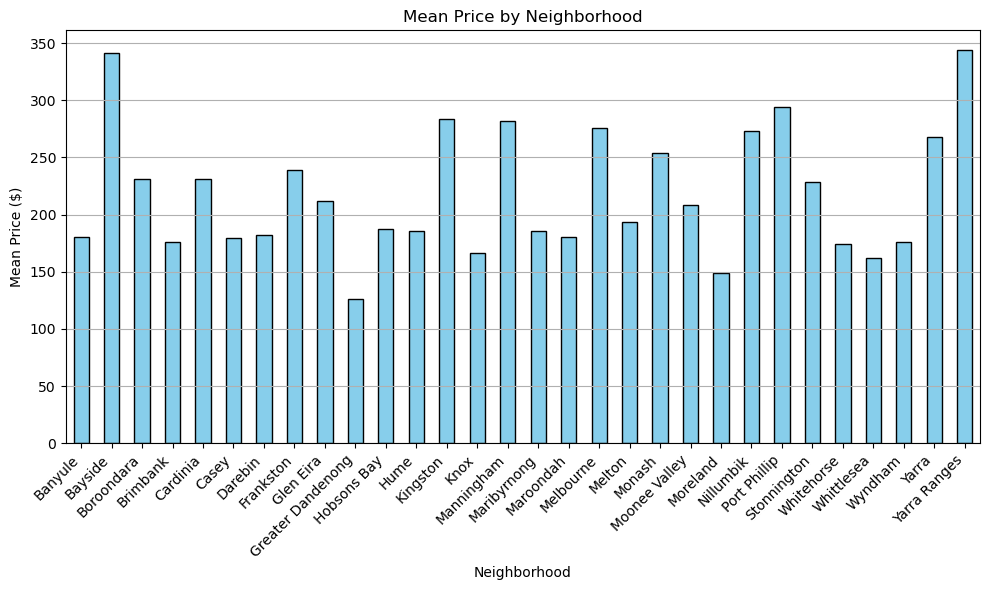

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called location_price_df
# with columns: 'neighbourhood_cleansed', 'price'

# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


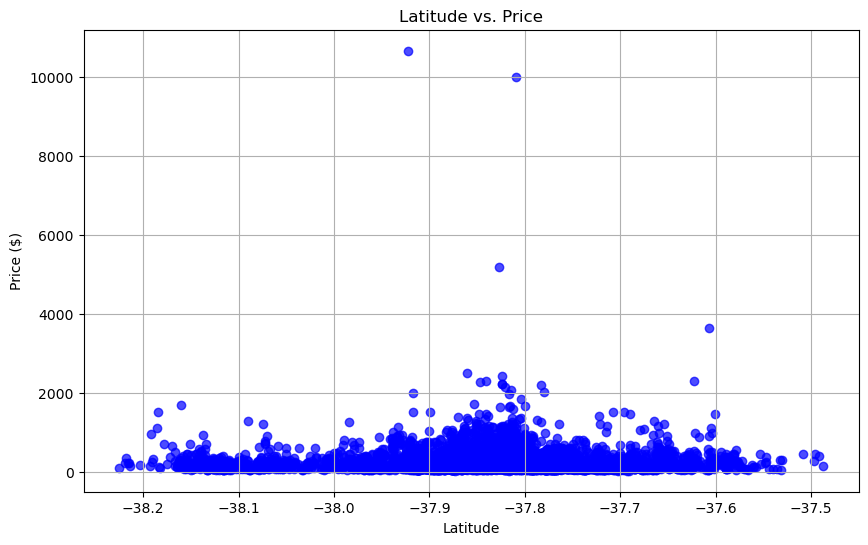

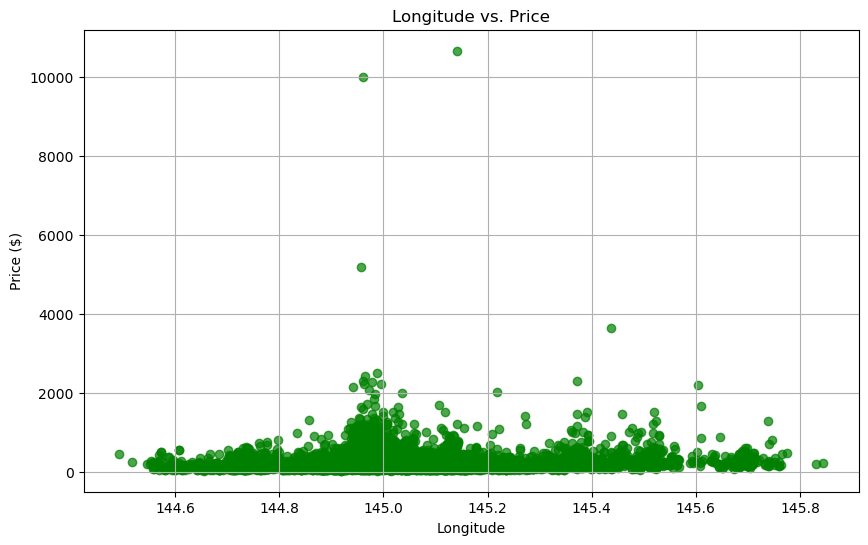

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame called location_price_df
# with columns: 'neighbourhood_cleansed', 'latitude', 'longitude', 'price'

# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()

# Create a scatter plot of latitude vs. price
plt.figure(figsize=(10, 6))
plt.scatter(location_price_df['latitude'], location_price_df['price'], color='b', marker='o', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Price ($)')
plt.title('Latitude vs. Price')
plt.grid(True)
plt.show()

# Create a scatter plot of longitude vs. price
plt.figure(figsize=(10, 6))
plt.scatter(location_price_df['longitude'], location_price_df['price'], color='g', marker='o', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Price ($)')
plt.title('Longitude vs. Price')
plt.grid(True)
plt.show()



In [87]:
from scipy.stats import ttest_ind
import pandas as pd

# Define the list of "city" councils
city_councils = ['City of Melbourne', 'City of Yarra', 'City of Port Phillip', 'City of Stonnington']

# Filter prices for "city" councils and other councils
city_prices = summary_df[summary_df['neighbourhood_cleansed'].isin(city_councils)]['Price']
other_prices = summary_df[~summary_df['neighbourhood_cleansed'].isin(['Port Phillip', 'Brimbank', 'Melbourne', 'Glen Eira', 'Yarra', 'Darebin', 'Boroondara', 'Hobsons Bay', 'Hume',
                                                                      'Stonnington', 'Yarra Ranges', 'Bayside', 'Moreland', 'Cardinia', 'Maribyrnong', 'Manningham', 'Banyule', 'Kingston', 'Whitehorse', 'Wyndham',
                                                                      'Frankston', 'Moonee Valley', 'Casey', 'Melton', 'Whittlesea', 'Monash', 'Nillumbik', 'Maroondah', 'Knox Greater', 'Dandenong'])]['Price']

# Perform independent samples t-test
t_stat, p_value = ttest_ind(city_prices, other_prices, equal_var=True)  # Adjust equal_var based on assumption

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 0.0
p-value: 1.0


Conclusions about relationships: The tests conducted are p test and t-test to see the significance of these relationships. The t-statistic of 0.0 indicates that the means of the two groups (city and non-city councils) are very similar. A p-value of 1.0 suggests that there is no significant difference between the means of the two groups. There is no significant difference in airbnb prices between city and non-city councils. 